### <a href="https://www5.cs.fau.de/fileadmin/research/datasets/fundus-images/all.zip">Dataset</a>

In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random
import tensorflow as tf
import keras.backend as K

from keras.preprocessing.image import ImageDataGenerator
from utils import Vessels, get_model
from keras.callbacks import ModelCheckpoint

In [10]:
#tf.config.run_functions_eagerly(True)
img_size = (160,160) # for now that's the only input shape that network process

In [11]:
X = []
y = []
z = []

images_dir = 'images'
targets_dir = 'manual1'
masks_dir = 'mask'

images = sorted(os.listdir(images_dir))
targets = sorted(os.listdir(targets_dir))
masks = sorted(os.listdir(masks_dir))

for img_dir, target_dir, mask_dir in zip(images, targets, masks):
    img = cv2.imread(os.path.join(images_dir, img_dir))
    img = cv2.resize(img, img_size)
    target = cv2.imread(os.path.join(targets_dir, target_dir), cv2.IMREAD_GRAYSCALE)
    target = cv2.resize(target, img_size)
    mask = cv2.imread(os.path.join(masks_dir, mask_dir), cv2.IMREAD_GRAYSCALE)
    mask = cv2.resize(mask, img_size)
    X.append(img)
    y.append(target)
    z.append(mask)

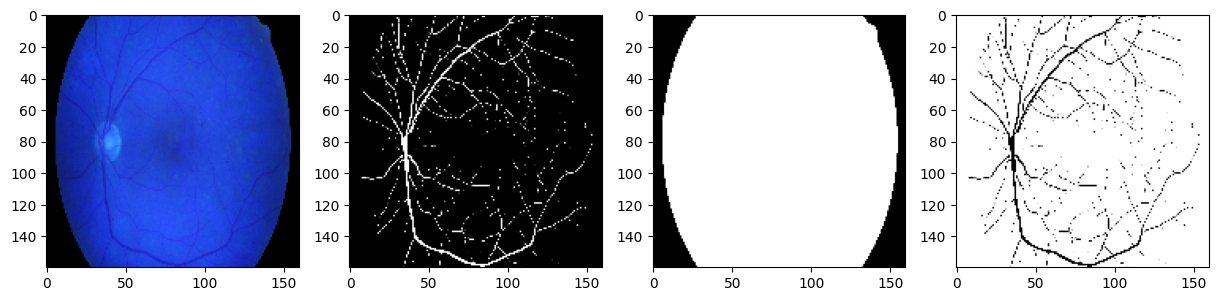

In [12]:
fig, ax = plt.subplots(1, 4, figsize=(15,10))
ax[0].imshow(X[0], cmap='gray')
ax[1].imshow(y[0], cmap='gray')
ax[2].imshow(z[0] , cmap='gray')
ax[3].imshow((255-y[0]), cmap='gray')
plt.show()
# np.sum((y[0] < 255) & (y[0] > 0))

In [19]:
val_samples = 5
batch_size = 4 

# y = [255-yi for yi in y]

x_train = np.array(X[:val_samples])
y_train = np.expand_dims(np.array(y[:val_samples]), 3)

x_val = np.array(X[val_samples:])
y_val = np.expand_dims(np.array(y[val_samples:]), 3)

x_train = x_train / 255
y_train = y_train / 255
x_val = x_val / 255
y_val = y_val / 255

y_train[(y_train > 0) & (y_train < 1)] = 0
y_val[(y_val > 0) & (y_val < 1)] = 0

#y_train = y_train.astype('int')
#y_val = y_val.astype('int')

train_datagen = ImageDataGenerator()
        #rotation_range=20,
        #zoom_range=0.2,
        #width_shift_range=0.2,
        #height_shift_range=0.2,
        #horizontal_flip=True,
        #vertical_flip=True,
        #rescale=1./255)

val_datagen = ImageDataGenerator() #rescale=1./255)

train_generator = train_datagen.flow(x_train, y_train, batch_size=batch_size)
val_generator = val_datagen.flow(x_val, y_val, batch_size=batch_size)

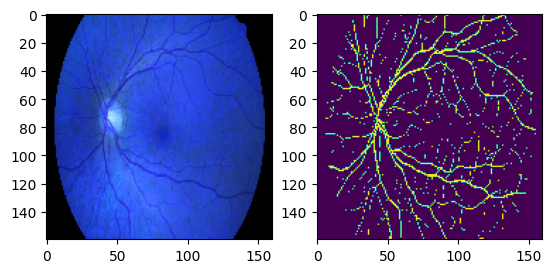

In [20]:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(val_generator[0][0][0])
ax[1].imshow(val_generator[0][1][0])
plt.show()

In [21]:
#img_dir = sorted([os.path.join(images_dir, img) for img in images])
#targ_dir = sorted([os.path.join(targets_dir, img) for img in targets])



#random.Random(1337).shuffle(img_dir)
#random.Random(1337).shuffle(targ_dir)
#train_input_img_paths = img_dir[:-val_samples]
#train_target_img_paths = target_dir[:-val_samples]
#val_input_img_paths = img_dir[-val_samples:]
#val_target_img_paths = targ_dir[-val_samples:]

#train_gen = Vessels(
#    batch_size, img_size, train_input_img_paths, train_target_img_paths
#)

#val_gen = Vessels(
#    batch_size, img_size, val_input_img_paths, val_target_img_paths
#)

#K.clear_session()

model = get_model(img_size, num_classes=2)
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=['accuracy'])

callbacks = [
    ModelCheckpoint("blood_vessels.h5", save_best_only=True)
]
epochs = 10
# model.fit(train_gen, epochs=epochs, validation_data=val_gen, callbacks=callbacks)#

In [22]:
model.fit(train_generator, epochs=epochs, validation_data=val_generator, callbacks=callbacks)

Epoch 1/10
2/2 [==============================] - 3s 1s/step - loss: 1.9604 - accuracy: 0.2906 - val_loss: 0.4876 - val_accuracy: 0.8984
Epoch 2/10
2/2 [==============================] - 1s 851ms/step - loss: 1.1466 - accuracy: 0.1072 - val_loss: 0.5015 - val_accuracy: 0.9707
Epoch 3/10
2/2 [==============================] - 1s 1s/step - loss: 0.8796 - accuracy: 0.5893 - val_loss: 0.4096 - val_accuracy: 0.9987
Epoch 4/10
2/2 [==============================] - 1s 1s/step - loss: 0.5126 - accuracy: 0.9330 - val_loss: 0.3878 - val_accuracy: 0.9766
Epoch 5/10
2/2 [==============================] - 1s 899ms/step - loss: 0.3844 - accuracy: 0.3164 - val_loss: 0.4139 - val_accuracy: 0.9146
Epoch 6/10
2/2 [==============================] - 1s 1s/step - loss: 0.3036 - accuracy: 0.8565 - val_loss: 0.4125 - val_accuracy: 0.9220
Epoch 7/10
2/2 [==============================] - 1s 1s/step - loss: 0.2839 - accuracy: 0.7732 - val_loss: 0.3815 - val_accuracy: 0.9180
Epoch 8/10
2/2 [===================

In [23]:
pred = model.predict(val_generator)

10/10 [==============================] - 1s 73ms/step


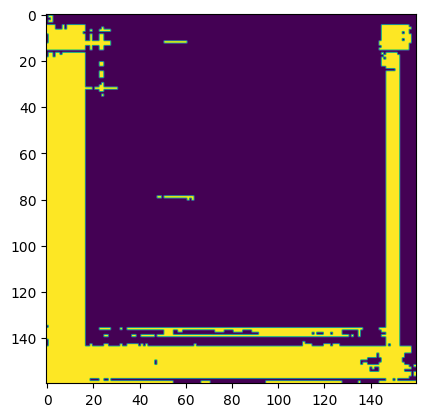

In [24]:
for k in range(len(pred)):

    predicted = np.zeros(img_size)

    for i in range(img_size[0]):
        for j in range(img_size[1]):
            predicted[i,j] = np.argmax(pred[k,i,j])

    plt.imshow(predicted)
    plt.show()
    
    break

In [ ]:
# 90000 / 150 / 150 / 4
# 102400 / 160 / 160 / 4